In [86]:
# prepare data
import pandas as pd
# data1 = pd.read_csv("/data/naifanzhang/moe_purning/mmlu/code/results/results_phi_part1.csv")
# data2 = pd.read_csv("/data/naifanzhang/moe_purning/mmlu/code/results/results_phi.csv")
# data = pd.concat([data1,data2])
data = pd.read_csv("/data/naifanzhang/moe_purning/mmlu/code/results/results_phi.csv")
data.drop_duplicates(inplace=True)
data.to_csv("results_phi.csv", index=False)

data.loc[data.domain=='computer science','domain'] = 'computer_science'


In [87]:
data['label'] = 'baseline'
data['label'][data['mask'].apply(lambda x: 'ours' in x)] = 'ours'
data

# 从mask列中提取数字
import re

def extract_number(mask_str):
    # 使用正则表达式匹配数字
    match = re.search(r'\d+', mask_str)
    if match:
        return int(match.group())
    return None

data['pruning_ratio'] = data['mask'].apply(extract_number)



/tmp/ipykernel_846331/3909395560.py:2: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the original `df`.

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

  data['label'][data['mask'].apply(lambda x: 'ours' in x)] = 'ours'
/tmp/ipykernel_846331/3909395560.py:2: SettingWithCopyWarning: 
A value is trying to be se

In [88]:
data = data[data.apply(lambda x: x['domain'] in x['mask'], axis=1)].reset_index(drop=True)

In [89]:
data.domain.value_counts()

domain
computer_science    12
law                 12
math                12
physics             12
psychology          12
Name: count, dtype: int64

In [90]:
data.to_csv("results_phi_mmlu.csv", index=False)

In [7]:
# 差math，physics，computer_science的16

In [91]:
import matplotlib.pyplot as plt
import pandas as pd
def plot_domain_accuracies(data, domains, axes=None, figsize=(24, 4)):
    """
    为多个领域绘制准确率对比图表
    """
    if axes is None:
        fig, axes = plt.subplots(1, 6, figsize=figsize)

    # 存储所有领域的数据用于计算平均值
    all_ours_data = []
    all_baseline_data = []

    def plot_domain_comparison(data, domain, ax, show_ylabel=False, show_legend=False):
        x = [0.375, 0.5, 0.625, 0.75, 0.875, 1]
        domain_data = data[data['domain'] == domain]
        domain_data = domain_data[domain_data.apply(lambda x: domain in x['mask'], axis=1)].reset_index(drop=True)
        
        # 分别获取ours和baseline的数据
        ours_data = domain_data[domain_data['label'] == 'ours'].sort_values('pruning_ratio')
        baseline_data = domain_data[domain_data['label'] == 'baseline'].sort_values('pruning_ratio')
        
        # 绘制两条线
        ax.plot(x, ours_data['accuracy'], label='ours', marker='o')
        ax.plot(x, baseline_data['accuracy'], label='baseline', marker='o')
        
        ax.set_xlabel('Parameter Retention Ratio')
        if show_ylabel:  # 只在第一个图显示y轴标签
            ax.set_ylabel('Mean Acc')
        ax.set_title(f'{domain}')
        if show_legend:  # 只在第一个图显示图例
            ax.legend(title='Method')
        ax.grid(True)
        
        return ours_data, baseline_data

    # 首先计算平均值
    for domain in domains:
        domain_data = data[data['domain'] == domain]
        domain_data = domain_data[domain_data.apply(lambda x: domain in x['mask'], axis=1)].reset_index(drop=True)
        
        ours_data = domain_data[domain_data['label'] == 'ours'].sort_values('pruning_ratio')
        baseline_data = domain_data[domain_data['label'] == 'baseline'].sort_values('pruning_ratio')
        
        all_ours_data.append(ours_data['accuracy'])
        all_baseline_data.append(baseline_data['accuracy'])

    # 先绘制Average在第一个位置
    x = [0.25, 0.375, 0.5, 0.625, 0.75, 1]
    axes[0].plot(x, 
                pd.Series([sum(x) for x in zip(*all_ours_data)]) / len(domains), 
                label='ours', marker='o')
    axes[0].plot(x, 
                pd.Series([sum(x) for x in zip(*all_baseline_data)]) / len(domains), 
                label='baseline', marker='o')

    axes[0].set_xlabel('Parameter Retention Ratio')
    axes[0].set_ylabel('Mean Acc')  # 只在第一个图显示y轴标签
    axes[0].set_title('Average')
    axes[0].legend(title='Method')  # 只在第一个图显示图例
    axes[0].grid(True)

    # 然后绘制其他领域的图表
    for i, domain in enumerate(domains):
        if i < len(domains):  # 确保不超出axes数量
            plot_domain_comparison(data, domain, axes[i+1], show_ylabel=False, show_legend=False)  # i+1 因为第一个位置已经用于Average

    plt.tight_layout()
    return axes

data_mmlu = data.copy()

# instruct

In [92]:
# prepare data
import pandas as pd
#data1 = pd.read_csv("/data/naifanzhang/moe_purning/Infinity-Instruct/code/results/results_phi_moe_beifen.csv")
data2 = pd.read_csv("/data/naifanzhang/moe_purning/Infinity-Instruct/code/results/results_phi_moe.csv")
# data = pd.concat([data1,data2])
data = data2
data.drop_duplicates(inplace=True)

data.loc[data.domain=='medical','domain'] = 'medicine'
data['mask'] = data['mask'].str.replace('medical', 'medicine')


In [93]:
data

,mask,domain,mean_perplexity,median_perplexity
0,instructcoding_baseline6,coding,161.021194,11.386626
1,instructcoding_baseline8,coding,46.805404,6.077340
2,instructcoding_baseline10,coding,8.120947,3.275687
3,instructcoding_baseline12,coding,4.143592,2.730427
4,instructcoding_baseline14,coding,3.831725,2.418755
...,...,...,...,...
79,instructsocial_ours10_global,social,12.044024,3.026383
80,instructsocial_ours12_global,social,573.384338,2.645324
81,instructsocial_ours14_global,social,71.349495,2.522614
82,instructsocial_ours16_global,social,63.056601,2.498493


In [94]:
data = data[data.apply(lambda x: x['domain'] in x['mask'], axis=1)].reset_index(drop=True)

In [95]:
data['label'] = 'baseline'
data['label'][data['mask'].apply(lambda x: 'ours' in x)] = 'ours'
data

# 从mask列中提取数字
import re

def extract_number(mask_str):
    # 使用正则表达式匹配数字
    match = re.search(r'\d+', mask_str)
    if match:
        return int(match.group())
    return None

data['pruning_ratio'] = data['mask'].apply(extract_number)





/tmp/ipykernel_846331/2511894690.py:2: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the original `df`.

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

  data['label'][data['mask'].apply(lambda x: 'ours' in x)] = 'ours'
/tmp/ipykernel_846331/2511894690.py:2: SettingWithCopyWarning: 
A value is trying to be se

In [96]:
data.domain.value_counts()

domain
coding         12
datascience    12
finance        12
math           12
medicine       12
safety         12
social         12
Name: count, dtype: int64

In [97]:
instruct_domain = ['coding','medicine','finance','safety','social']
data = data[data.domain.isin(instruct_domain)].reset_index(drop=True)


In [98]:
def plot_domain_comparisons(data, domains, axes=None, figsize=(24, 4), ylim=(0, 20), x_values=None):
    if x_values is None:
        x_values = [0.375, 0.5, 0.625, 0.75, 0.875, 1]
        
    if axes is None:
        fig, axes = plt.subplots(1, 6, figsize=figsize)
    
    # 存储所有领域的数据用于计算平均值
    all_ours_data = []
    all_baseline_data = []

    def plot_domain_comparison(data, domain, ax, show_ylabel=False):
        domain_data = data[data['domain'] == domain]
        domain_data = domain_data[domain_data.apply(lambda x: domain in x['mask'], axis=1)].reset_index(drop=True)
        
        # 分别获取ours和baseline的数据
        ours_data = domain_data[domain_data['label'] == 'ours'].sort_values('pruning_ratio')
        baseline_data = domain_data[domain_data['label'] == 'baseline'].sort_values('pruning_ratio')

        ours_perplexity = np.log(ours_data['median_perplexity'])
        baseline_perplexity = np.log(baseline_data['median_perplexity'])
        
        # 绘制两条线
        ax.plot(x_values, ours_perplexity, label='ours', marker='o')
        ax.plot(x_values, baseline_perplexity, label='baseline', marker='o')
        
        ax.set_xlabel('Parameter Retention Ratio')
        if show_ylabel:  # 只在第一个图显示y轴标签
            ax.set_ylabel('Log Median Perplexity')
        ax.set_title(f'{domain}')
        ax.grid(True)
        
        return ours_data, baseline_data

    # 首先计算平均值
    for domain in domains:
        domain_data = data[data['domain'] == domain]
        domain_data = domain_data[domain_data.apply(lambda x: domain in x['mask'], axis=1)].reset_index(drop=True)
        
        ours_data = domain_data[domain_data['label'] == 'ours'].sort_values('pruning_ratio')
        baseline_data = domain_data[domain_data['label'] == 'baseline'].sort_values('pruning_ratio')
        
        all_ours_data.append(ours_data['median_perplexity'])
        all_baseline_data.append(baseline_data['median_perplexity'])

    # 先绘制Average在第一个位置
    axes[0].plot(x_values, 
                pd.Series(np.log([sum(x) for x in zip(*all_ours_data)])) / len(domains), 
                label='ours', marker='o')
    axes[0].plot(x_values, 
                pd.Series(np.log([sum(x) for x in zip(*all_baseline_data)])) / len(domains), 
                label='baseline', marker='o')

    axes[0].set_xlabel('Parameter Retention Ratio')
    axes[0].set_ylabel('Log Median Perplexity')  # 只在第一个图显示y轴标签
    axes[0].set_title('Average')
    axes[0].legend(title='Method')
    axes[0].grid(True)

    # 然后绘制其他领域的图表
    for i, domain in enumerate(domains):
        if i < len(domains):  # 确保不超出axes数量
            plot_domain_comparison(data, domain, axes[i+1], show_ylabel=False)  # i+1 因为第一个位置已经用于Average

    plt.tight_layout()
    return axes

data_instruct = data

# Random

In [99]:
# prepare data
import pandas as pd
# data1 = pd.read_csv("/data/naifanzhang/moe_purning/mmlu/code/results/results_phi_part1.csv")
# data2 = pd.read_csv("/data/naifanzhang/moe_purning/mmlu/code/results/results_phi.csv")
# data = pd.concat([data1,data2])
data1 = pd.read_csv("/data/naifanzhang/moe_purning/mmlu/code/results/results_phi_random.csv")
data2 = pd.read_csv("/data/naifanzhang/moe_purning/mmlu/code/results/results_phi.csv")
data = pd.concat([data1,data2]).reset_index(drop=True)
data.drop_duplicates(inplace=True)
data.to_csv("results_phi.csv", index=False)

data.loc[data.domain=='computer science','domain'] = 'computer_science'


In [ ]:
data['label'] = 'baseline'
data['label'][data['mask'].apply(lambda x: 'ours' in x)] = 'ours'
data['label'][data['mask'].apply(lambda x: 'random' in x)] = 'random'
data

# 从mask列中提取数字
import re

def extract_number(mask_str):
    # 使用正则表达式匹配数字
    match = re.search(r'\d+', mask_str)
    if match:
        return int(match.group())
    return None

data['pruning_ratio'] = data['mask'].apply(extract_number)

In [110]:
import matplotlib.pyplot as plt
import pandas as pd
def plot_domain_accuracies(data, domains, axes=None, figsize=(24, 4)):
    """
    为多个领域绘制准确率对比图表
    """
    if axes is None:
        fig, axes = plt.subplots(1, 6, figsize=figsize)

    # 存储所有领域的数据用于计算平均值
    all_ours_data = []
    all_baseline_data = []

    def plot_domain_comparison(data, domain, ax, show_ylabel=False, show_legend=False):
        x = [0.375, 0.5, 0.625, 0.75, 0.875, 1]
        domain_data = data[data['domain'] == domain]
        #domain_data = domain_data[domain_data.apply(lambda x: domain in x['mask'], axis=1)].reset_index(drop=True)
        
        # 分别获取ours、baseline和random的数据
        ours_data = domain_data[domain_data['label'] == 'ours'].sort_values('pruning_ratio')
        baseline_data = domain_data[domain_data['label'] == 'baseline'].sort_values('pruning_ratio')
        random_data = domain_data[domain_data['label'] == 'random'].sort_values('pruning_ratio')
        
        # 绘制三条线
        ax.plot(x, ours_data['accuracy'], label='ours', marker='o')
        ax.plot(x, baseline_data['accuracy'], label='baseline', marker='o')
        ax.plot(x, random_data['accuracy'], label='random', marker='o')  # 添加random线
        
        ax.set_xlabel('Parameter Retention Ratio')
        if show_ylabel:
            ax.set_ylabel('Mean Acc')
        ax.set_title(f'{domain}')
        if show_legend:
            ax.legend(title='Method')
        ax.grid(True)
        
        return ours_data, baseline_data, random_data

    # 存储所有领域的数据
    all_ours_data = []
    all_baseline_data = []
    all_random_data = []  # 添加random数据存储

    # 在计算平均值的循环中:
    for domain in domains:
        domain_data = data[data['domain'] == domain]
        #domain_data = domain_data[domain_data.apply(lambda x: domain in x['mask'], axis=1)].reset_index(drop=True)
        
        ours_data = domain_data[domain_data['label'] == 'ours'].sort_values('pruning_ratio')
        baseline_data = domain_data[domain_data['label'] == 'baseline'].sort_values('pruning_ratio')
        random_data = domain_data[domain_data['label'] == 'random'].sort_values('pruning_ratio')
        
        all_ours_data.append(ours_data['accuracy'])
        all_baseline_data.append(baseline_data['accuracy'])
        all_random_data.append(random_data['accuracy'])

    # 绘制Average图表时添加random线
    x = [0.25, 0.375, 0.5, 0.625, 0.75, 1]
    axes[0].plot(x, 
                pd.Series([sum(x) for x in zip(*all_ours_data)]) / len(domains), 
                label='ours', marker='o')
    axes[0].plot(x, 
                pd.Series([sum(x) for x in zip(*all_baseline_data)]) / len(domains), 
                label='baseline', marker='o')
    axes[0].plot(x, 
                pd.Series([sum(x) for x in zip(*all_random_data)]) / len(domains), 
                label='random', marker='o')  # 添加random平均线

    # 然后绘制其他领域的图表
    for i, domain in enumerate(domains):
        if i < len(domains):  # 确保不超出axes数量
            plot_domain_comparison(data, domain, axes[i+1], show_ylabel=False, show_legend=False)  # i+1 因为第一个位置已经用于Average

    plt.tight_layout()
    return axes

data_mmlu = data.copy()

In [ ]:
data[data['label'] == 'random'].sort_values('pruning_ratio')

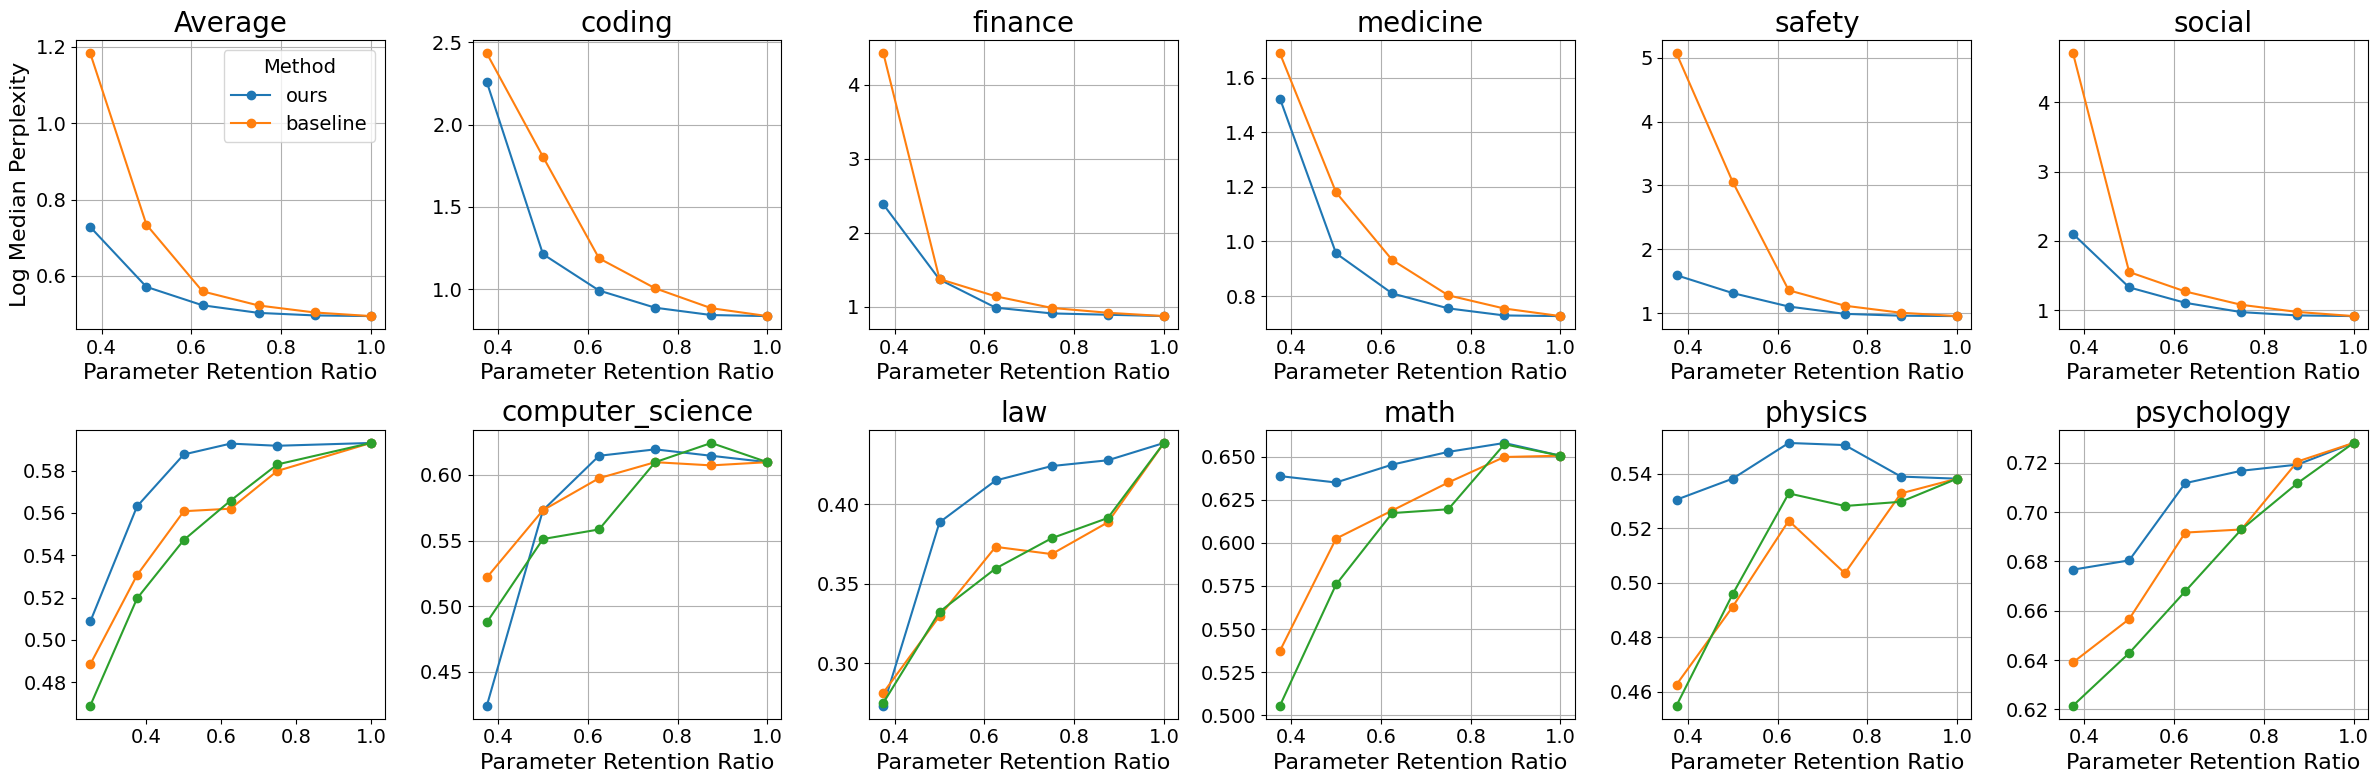

In [112]:
import numpy as np
plt.rcParams.update({'font.size': 14}) 

#data_instruct = data.copy()
domains_isstruct = data_instruct.domain.unique()
#data_mmlu = data.copy()
domains_mmlu = data_mmlu[data_mmlu.domain != 'health'].domain.unique()

# 创建2x6的子图布局
fig, axes = plt.subplots(2, 6, figsize=(24, 8))  # 调整figsize以适应两行

# 第一行: plot_domain_comparisons
plot_domain_comparisons(data_instruct, domains_isstruct, axes=axes[0])

# 第二行: plot_domain_accuracies  
plot_domain_accuracies(data_mmlu, domains_mmlu, axes=axes[1])

# 调整每个子图的字体大小
for ax in axes.flatten():
    # 设置标题字体大小
    ax.set_title(ax.get_title(), fontsize=20)
    
    # 设置x轴和y轴标签字体大小
    ax.set_xlabel(ax.get_xlabel(), fontsize=16)
    ax.set_ylabel(ax.get_ylabel(), fontsize=16)
    
    # 设置刻度标签字体大小
    ax.tick_params(axis='both', labelsize=14)
    
    # # 设置图例字体大小
    # legend = ax.get_legend()
    # if legend:
    #     legend.set_title(legend.get_title().get_text(), fontsize=14)
    #     for text in legend.get_texts():
    #         text.set_fontsize(12)

# 保存高分辨率图片
plt.savefig('comparison_plot_high_res.png', 
            dpi=1000,              # 设置DPI
            bbox_inches='tight',  # 去除多余的白边
            pad_inches=0.1)       # 设置边距

plt.show()

# 热力图

In [53]:
# prepare data
import pandas as pd
data1 = pd.read_csv("/data/naifanzhang/moe_purning/mmlu/code/results/results_phi_task2.csv")
data2 = pd.read_csv("/data/naifanzhang/moe_purning/mmlu/code/results/results_phi.csv")
data = pd.concat([data1, data2]).reset_index(drop=True)
data.drop_duplicates(inplace=True)

In [54]:
data.loc[data.domain=='computer science','domain'] = 'computer_science'
data['label'] = 'baseline'
data['label'][data['mask'].apply(lambda x: 'ours' in x)] = 'ours'
data

# 从mask列中提取数字
import re

def extract_number(mask_str):
    # 使用正则表达式匹配数字
    match = re.search(r'\d+', mask_str)
    if match:
        return int(match.group())
    return None

data['pruning_ratio'] = data['mask'].apply(extract_number)



/tmp/ipykernel_846331/398338218.py:3: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the original `df`.

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

  data['label'][data['mask'].apply(lambda x: 'ours' in x)] = 'ours'
/tmp/ipykernel_846331/398338218.py:3: SettingWithCopyWarning: 
A value is trying to be set 

In [55]:
data

,mask,domain,accuracy,label,pruning_ratio
0,computer_science_ours8_global,computer_science,0.573171,ours,8
1,computer_science_ours8_global,law,0.308810,ours,8
2,computer_science_ours8_global,math,0.612879,ours,8
3,computer_science_ours8_global,physics,0.492687,ours,8
4,computer_science_ours8_global,psychology,0.606516,ours,8
...,...,...,...,...,...
79,psychology_ours6_global,psychology,0.676692,ours,6
81,psychology_ours10_global,psychology,0.711779,ours,10
82,psychology_ours12_global,psychology,0.716792,ours,12
83,psychology_ours14_global,psychology,0.719298,ours,14


In [56]:
mmlu_data= data[data.pruning_ratio==8].reset_index(drop=True)
origianl_mmlu = data[data.pruning_ratio==16].reset_index(drop=True)
origianl_mmlu = origianl_mmlu[origianl_mmlu.apply(lambda x: x['domain'] in x['mask'], axis=1)].reset_index(drop=True)

domain_list = ['math','physics','computer_science','psychology','law']
idx = (mmlu_data.domain.isin(domain_list)) & (mmlu_data.label=='ours') & (mmlu_data['mask']!='health_ours8_global')
mmlu_data =mmlu_data.loc[idx].reset_index(drop=True)

origianl_mmlu = origianl_mmlu.loc[origianl_mmlu.label=='ours'].reset_index(drop=True)

In [57]:
mmlu_data

,mask,domain,accuracy,label,pruning_ratio
0,computer_science_ours8_global,computer_science,0.573171,ours,8
1,computer_science_ours8_global,law,0.308810,ours,8
2,computer_science_ours8_global,math,0.612879,ours,8
3,computer_science_ours8_global,physics,0.492687,ours,8
4,computer_science_ours8_global,psychology,0.606516,ours,8
5,law_ours8_global,computer_science,0.497561,ours,8
6,law_ours8_global,law,0.388738,ours,8
7,law_ours8_global,math,0.569208,ours,8
8,law_ours8_global,physics,0.454965,ours,8
9,law_ours8_global,psychology,0.665414,ours,8


In [58]:

results = []
for i in mmlu_data['mask'].unique():
    r = {}
    tmp_data = mmlu_data[mmlu_data['mask']==i]
    for j in mmlu_data['domain'].unique():
        origianl_acc = origianl_mmlu[origianl_mmlu['domain']==j].accuracy.values[0]
        pruned_acc = tmp_data[tmp_data['domain']==j].accuracy.values[0]
        #dif_target = abs(pruned_acc - origianl_acc) / origianl_acc
        dif_target = (origianl_acc - pruned_acc) / origianl_acc
        if j in i:
            r[f'source_{j}'] = dif_target
        else:
            r[f'target_{j}'] = dif_target
    results.append(r)
#results = pd.DataFrame(results)



In [ ]:
results


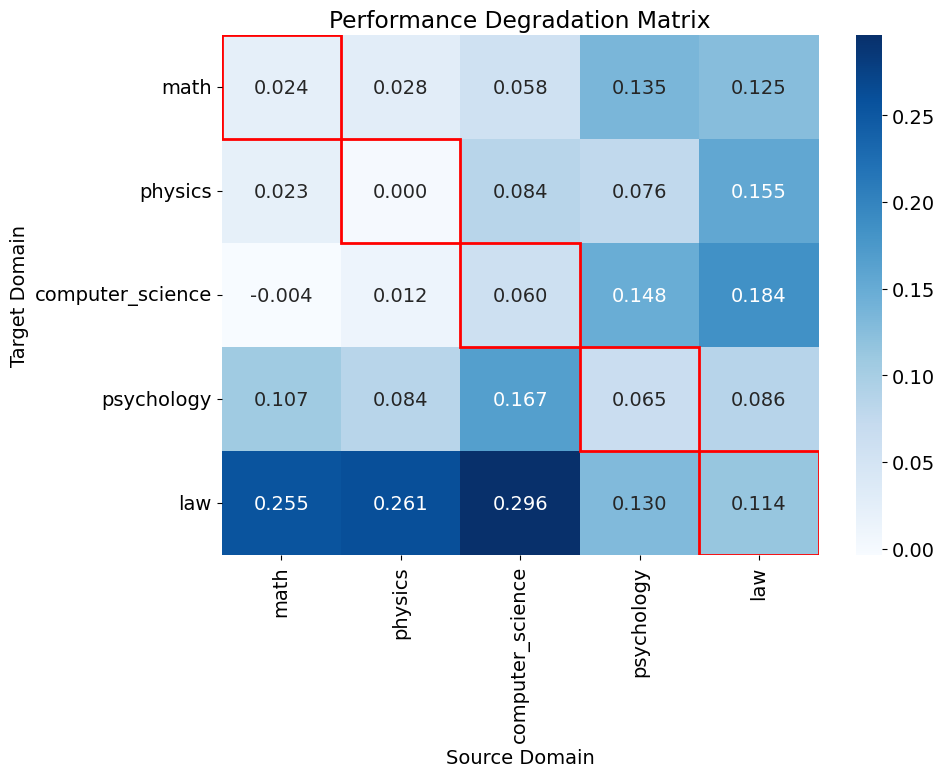

In [60]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# 准备数据
matrix_data = []
domains = ['math', 'physics', 'computer_science', 'psychology', 'law']

for target_domain in domains:  # 改为先遍历target domain
    row = []
    for source_domain in domains:  # 再遍历source domain
        # 找到对应source domain的result
        result = next(r for r in results if f'source_{source_domain}' in r)
        
        if target_domain == source_domain:
            # 使用source值作为对角线元素
            value = result[f'source_{source_domain}']
        else:
            # 使用target值作为非对角线元素
            value = result[f'target_{target_domain}']
        row.append(value)
    matrix_data.append(row)

# 创建DataFrame，注意这里index和columns的顺序也要调换
matrix = pd.DataFrame(matrix_data, 
                     index=domains,  # 现在index代表target domain
                     columns=domains)  # columns代表source domain

# 绘制热力图
plt.figure(figsize=(10, 8))
sns.heatmap(matrix, 
            annot=True, 
            fmt='.3f',
            cmap='Blues',
            xticklabels=domains,
            yticklabels=domains)

# 添加标题和标签
plt.title('Performance Degradation Matrix')
plt.xlabel('Source Domain')  # 修改标签
plt.ylabel('Target Domain')  # 修改标签

# 在对角线元素周围添加边框
ax = plt.gca()
for i in range(len(domains)):
    rect = plt.Rectangle((i, i), 1, 1, fill=False, edgecolor='red', linewidth=2)
    ax.add_patch(rect)

plt.tight_layout()
plt.show()

# instruct

In [66]:
# prepare data
import pandas as pd
data1 = pd.read_csv("/data/naifanzhang/moe_purning/Infinity-Instruct/code/results/results_phi_moe_task2.csv")
data2 = pd.read_csv("/data/naifanzhang/moe_purning/Infinity-Instruct/code/results/results_phi_moe.csv")
data = pd.concat([data1, data2]).reset_index(drop=True)
data.drop_duplicates(inplace=True)

data.loc[data.domain=='medical','domain'] = 'medicine'
data['mask'] = data['mask'].str.replace('medical', 'medicine')

In [67]:
data['label'] = 'baseline'
data['label'][data['mask'].apply(lambda x: 'ours' in x)] = 'ours'
data

# 从mask列中提取数字
import re

def extract_number(mask_str):
    # 使用正则表达式匹配数字
    match = re.search(r'\d+', mask_str)
    if match:
        return int(match.group())
    return None

data['pruning_ratio'] = data['mask'].apply(extract_number)



/tmp/ipykernel_846331/3909395560.py:2: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the original `df`.

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

  data['label'][data['mask'].apply(lambda x: 'ours' in x)] = 'ours'
/tmp/ipykernel_846331/3909395560.py:2: SettingWithCopyWarning: 
A value is trying to be se

In [68]:
instruct_data= data[data.pruning_ratio==8].reset_index(drop=True)
origianl_instruct = data[data.pruning_ratio==16].reset_index(drop=True)
origianl_instruct = origianl_instruct[origianl_instruct.apply(lambda x: x['domain'] in x['mask'], axis=1)].reset_index(drop=True)

domain_list = ['coding','medicine','finance','safety','social']
idx = (instruct_data.domain.isin(domain_list)) & (instruct_data.label=='ours') & (instruct_data['mask']!='health_ours8_global')
instruct_data =instruct_data.loc[idx].reset_index(drop=True)

origianl_instruct = origianl_instruct.loc[origianl_instruct.label=='ours'].reset_index(drop=True)


In [69]:

results_instruct = []
for i in instruct_data['mask'].unique():
    r = {}
    tmp_data = instruct_data[instruct_data['mask']==i]
    for j in instruct_data['domain'].unique():
        origianl_median_perplexity = origianl_instruct[origianl_instruct['domain']==j].median_perplexity.values[0]
        pruned_median_perplexity = tmp_data[tmp_data['domain']==j].median_perplexity.values[0]
        #dif_target = abs(pruned_median_perplexity - origianl_median_perplexity) / origianl_median_perplexity
        dif_target = (pruned_median_perplexity - origianl_median_perplexity) / origianl_median_perplexity
        if j in i:
            r[f'source_{j}'] = dif_target
        else:
            r[f'target_{j}'] = dif_target
    results_instruct.append(r)
#results = pd.DataFrame(results)



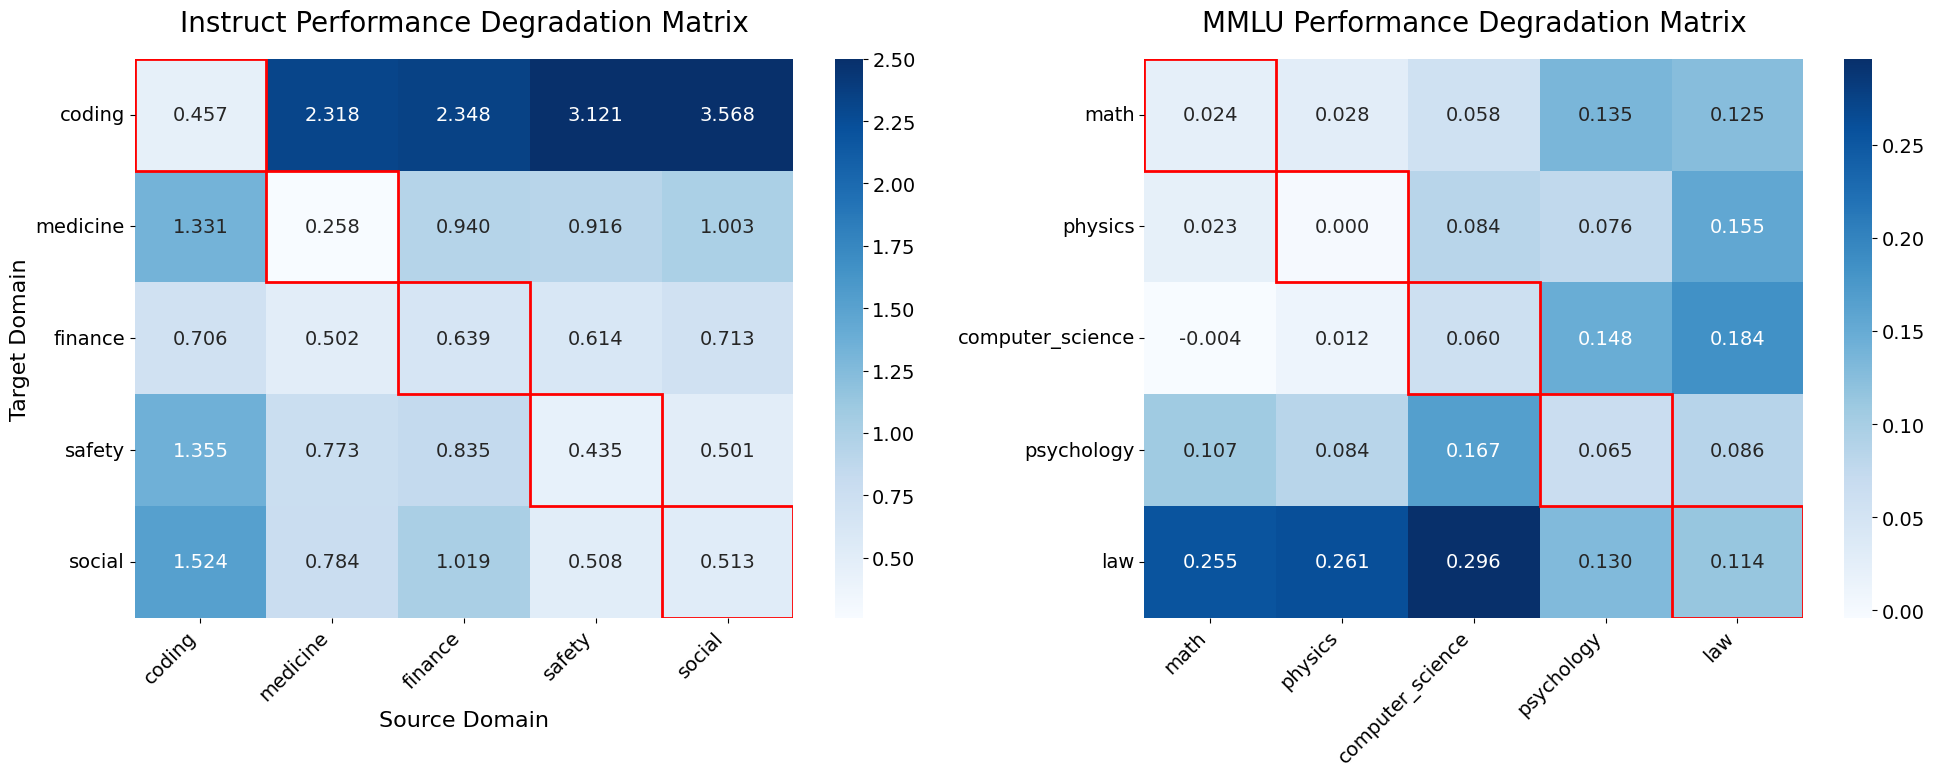

In [71]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# 设置全局字体大小
plt.rcParams.update({'font.size': 14}) 

# 创建1x2的图布局
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(20, 8))

# 第一个热力图（Instruct数据）
domains_instruct = ['coding', 'medicine', 'finance', 'safety', 'social']
matrix_data = []
for target_domain in domains_instruct:
    row = []
    for source_domain in domains_instruct:
        result = next(r for r in results_instruct if f'source_{source_domain}' in r)
        value = result[f'source_{source_domain}'] if target_domain == source_domain else result[f'target_{target_domain}']
        row.append(value)
    matrix_data.append(row)

matrix_instruct = pd.DataFrame(matrix_data, index=domains_instruct, columns=domains_instruct)

# 绘制第一个热力图
sns.heatmap(matrix_instruct, 
            ax=ax1,
            annot=True, 
            fmt='.3f',
            cmap='Blues',
            xticklabels=domains_instruct,
            yticklabels=domains_instruct,
            vmax=2.5)  # 设置最大刻度为2.5

# 第二个热力图（MMLU数据）
domains_mmlu = ['math', 'physics', 'computer_science', 'psychology', 'law']
matrix_data = []
for target_domain in domains_mmlu:
    row = []
    for source_domain in domains_mmlu:
        result = next(r for r in results if f'source_{source_domain}' in r)
        value = result[f'source_{source_domain}'] if target_domain == source_domain else result[f'target_{target_domain}']
        row.append(value)
    matrix_data.append(row)

matrix_mmlu = pd.DataFrame(matrix_data, index=domains_mmlu, columns=domains_mmlu)

# 绘制第二个热力图
sns.heatmap(matrix_mmlu, 
            ax=ax2,
            annot=True, 
            fmt='.3f',
            cmap='Blues',
            xticklabels=domains_mmlu,
            yticklabels=domains_mmlu)

# 设置第一个图的标签和样式
ax1.set_xlabel('Source Domain', fontsize=16)
ax1.set_ylabel('Target Domain', fontsize=16)
ax1.tick_params(axis='both', labelsize=14)
ax1.set_xticklabels(ax1.get_xticklabels(), rotation=45, ha='right')
ax1.set_yticklabels(ax1.get_yticklabels(), rotation=0)

# 设置第二个图的样式（不包含坐标轴标签）
ax2.tick_params(axis='both', labelsize=14)
ax2.set_xticklabels(ax2.get_xticklabels(), rotation=45, ha='right')
ax2.set_yticklabels(ax2.get_yticklabels(), rotation=0)

# 设置标题
ax1.set_title('Instruct Performance Degradation Matrix', fontsize=20, pad=20)
ax2.set_title('MMLU Performance Degradation Matrix', fontsize=20, pad=20)

# 添加对角线边框
for ax in [ax1, ax2]:
    for i in range(len(ax.get_xticklabels())):
        rect = plt.Rectangle((i, i), 1, 1, fill=False, edgecolor='red', linewidth=2)
        ax.add_patch(rect)

plt.tight_layout()

# 保存高分辨率图片
plt.savefig('performance_degradation_matrix.png', 
            dpi=1000,              # 设置DPI
            bbox_inches='tight',    # 去除多余的白边
            pad_inches=0.1)        # 设置边距

plt.show()